# TCC - Data Science
##### Yane Sarmento Holanda
##### yanesholanda@gmail.com
##### Detecção de Fraude utilizando o algoritmo Autoxgb

# 1. Instalação de bibliotecas necessárias




In [ ]:
pip install autoxgb

In [ ]:
pip install imblearn

# 2. Importação dos dados 

In [3]:
import pandas as pd

In [34]:
df = pd.read_csv("creditcard.csv")

In [35]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [36]:
df = df.rename(columns={"Class":"Fraud"})

In [37]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Fraud     float64
dtype: object

In [38]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Fraud     1
dtype: int64

In [39]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,...,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0
49609,44135,-4.719790,-4.249875,1.850000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df = df[:-1]
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
49604,44132,-1.623757,-1.486672,3.191250,-0.613841,-1.316739,0.585336,-0.005224,0.389628,2.427135,...,0.305795,0.903998,0.229926,0.383144,0.588491,-0.383920,-0.108623,-0.118653,246.76,0.0
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,...,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0


In [41]:
# O Modelo pode interpretar os valores como mais importantes sendo maiores.
df.drop('Time', axis = 1, inplace = True)

In [42]:
df = df.astype({'Fraud': 'int'})

In [43]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df["Fraud"].value_counts()

0    49461
1      148
Name: Fraud, dtype: int64

# 3. EDA

In [45]:
import seaborn as sns

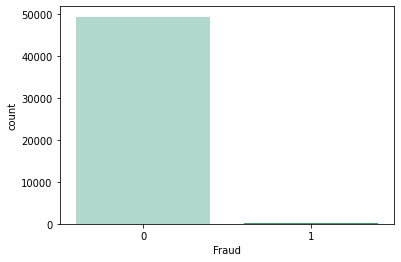

In [46]:
sns.countplot(x = "Fraud", data = df, palette = "BuGn")

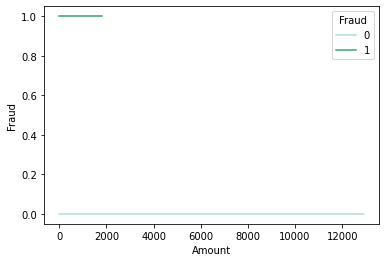

In [55]:
# Percebemos que o valor da transação não tem relação à fraude, uma vez que há 
# incidência de fraude em transações de valores pequenos
sns.lineplot(data = df,
            x = "Amount",
             y = "Fraud",
            hue = "Fraud",
            palette = "BuGn" 
            )

In [59]:
corr = df.corr()

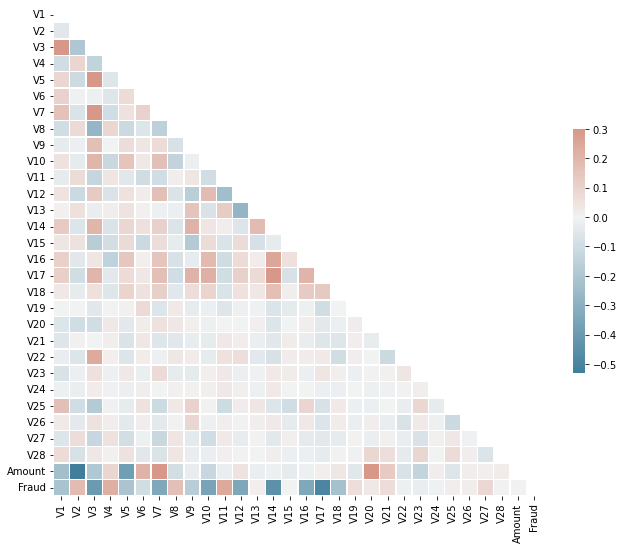

In [62]:
import numpy as np
import matplotlib.pyplot as plt


mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 4. Lidando com o desbalanceamento dos dados

In [64]:
from sklearn.model_selection import train_test_split

y = df.Fraud
X = df.drop('Fraud', axis=1)

#### Testando técnicas de balanceamento - RandomUnderSampler

In [66]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.4)

In [67]:
X_under, y_under = under.fit_resample(X, y)

In [68]:
from collections import Counter
print(sorted(Counter(y_under).items()))

[(0, 370), (1, 148)]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [70]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
176,0.905827,-0.808694,0.339711,-0.842017,-0.662556,0.266385,-0.393504,0.273096,1.375173,-1.012585,...,0.033481,0.171488,0.485086,-0.154280,-0.257046,0.439806,-0.595805,0.075972,0.029677,123.32
132,1.230740,0.561975,-0.000355,1.262990,0.302097,-0.673764,0.391795,-0.303475,0.988721,-0.373273,...,-0.218060,-0.116953,0.000348,-0.107817,0.036615,0.758483,-0.305981,-0.018209,0.001883,4.80
6,1.284399,0.069921,-1.032817,-0.870762,0.097070,-1.342942,0.394177,-0.252897,1.071875,-1.404611,...,-0.066977,-0.495349,-1.523705,-0.035117,-0.629460,0.531611,-0.849487,0.016119,0.043860,47.56
84,0.751944,-0.763951,0.821812,1.742477,-1.258555,-0.378035,-0.143356,0.045749,1.139079,-0.313736,...,0.128715,0.013209,-0.156313,-0.221255,0.701894,0.520411,-0.339395,0.009845,0.060767,209.95
456,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,-2.734156,...,0.265250,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.596262,0.325812,2.873095,0.322571,-1.042456,0.394915,0.549871,-0.490705,-0.933222,0.888633,...,-0.238014,-0.415664,-0.236558,-0.265044,0.383496,0.055889,-0.345841,-0.382135,-0.372609,99.00
371,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
471,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70
391,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,-5.576023,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10


In [71]:
y_test

176    0
132    0
6      0
84     0
456    1
      ..
302    0
371    1
471    1
391    1
380    1
Name: Fraud, Length: 104, dtype: int64

In [72]:
df_resampled = pd.concat([pd.DataFrame(X_under), pd.DataFrame(y_under, columns=['Fraud'])], axis=1)

In [73]:
print('Resampled dataset %s' % Counter(df_resampled["Fraud"]))

Resampled dataset Counter({0: 370, 1: 148})


In [74]:
print(len(df_resampled))

518


In [75]:
import numpy as np

train_data, validation_data, test_data = np.split(
    df_resampled.sample(frac=1, random_state = 42),
    [int(0.6 * len(df_resampled)), int(0.8 * len(df_resampled))],
)

In [76]:
train_data.to_csv('train_under.csv', index=None)
test_data.to_csv('test_under.csv', index=None)
validation_data.to_csv('validation_under.csv', index=None)

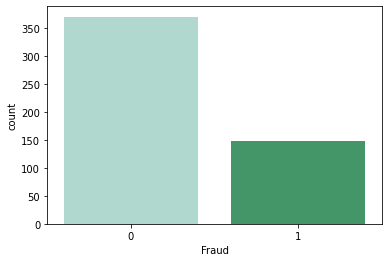

In [77]:
sns.countplot(data=df_resampled, x="Fraud", palette = "BuGn")

In [78]:
train_under = train_data
test_under = test_data
validation_under = validation_data

In [79]:
print("Size of Train Data:", len(train_under))
print("Size of Test Data:", len(test_under))
print("Size of Validation Data:", len(validation_under))

Size of Train Data: 310
Size of Test Data: 104
Size of Validation Data: 104


In [80]:
from autoxgb import AutoXGB


# required parameters:
test_filename = "test_under.csv"
train_filename = "train_under.csv"
output = "output/teste_under"
task = "classification"
idx = None
targets = ["Fraud"]
time_limit = 360
fast = True
early_stopping_rounds=10

In [81]:
X_test = test_data.drop(columns=targets)
y_test = test_data["Fraud"]

In [82]:
# Now its time to train the model!
axgb = AutoXGB(
    train_filename=train_filename,
    output=output,
    test_filename=test_filename,
    task=task,
    idx=idx,
    targets=targets,
    time_limit=time_limit,
    fast=fast
)
axgb.train()

2022-04-20 16:09:34.598 | INFO     | autoxgb.autoxgb:__post_init__:42 - Output directory: output/teste_under
2022-04-20 16:09:34.600 | WARNING  | autoxgb.autoxgb:__post_init__:49 - No id column specified. Will default to `id`.
2022-04-20 16:09:34.601 | INFO     | autoxgb.autoxgb:_process_data:149 - Reading training data
2022-04-20 16:09:34.641 | INFO     | autoxgb.utils:reduce_memory_usage:50 - Mem. usage decreased to 0.02 Mb (75.3% reduction)
2022-04-20 16:09:34.646 | INFO     | autoxgb.autoxgb:_determine_problem_type:140 - Problem type: binary_classification
2022-04-20 16:09:34.677 | INFO     | autoxgb.utils:reduce_memory_usage:50 - Mem. usage decreased to 0.01 Mb (75.0% reduction)
2022-04-20 16:09:34.679 | INFO     | autoxgb.autoxgb:_create_folds:58 - Creating folds
2022-04-20 16:09:34.692 | INFO     | autoxgb.autoxgb:_process_data:170 - Encoding target(s)
2022-04-20 16:09:34.701 | INFO     | autoxgb.autoxgb:_process_data:195 - Found 0 categorical features.
2022-04-20 16:09:34.791 |

[16:09:35] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:09:39.448 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 0.9987373737373737, 'logloss': 0.21381193532426165, 'f1': 0.972972972972973, 'accuracy': 0.9838709677419355, 'precision': 0.9473684210526315, 'recall': 1.0}
[I 2022-04-20 16:09:39,503] Trial 0 finished with value: 0.21381193532426165 and parameters: {'learning_rate': 0.01526506529162652, 'reg_lambda': 1.7500665785972087e-06, 'reg_alpha': 7.822091690619936e-08, 'subsample': 0.710994178443189, 'colsample_bytree': 0.14446827560864628, 'max_depth': 8, 'early_stopping_rounds': 423, 'n_estimators': 15000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 0 with value: 0.21381193532426165.
2022-04-20 16:09:48.181 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.0061272760466372055, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:09:48,227] Trial 1 finished with value: 0.0061272760466372055 and parameters: {'learning_rate': 0.1822067409501943

[16:11:19] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2022-04-20 16:11:21.409 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.5552354094482237, 'f1': 0.0, 'accuracy': 0.7096774193548387, 'precision': 0.0, 'recall': 0.0}
[I 2022-04-20 16:11:21,450] Trial 4 finished with value: 0.5552354094482237 and parameters: {'learning_rate': 0.1558560364451517, 'reg_lambda': 32.500982093317134, 'reg_alpha': 1.7232743884505466, 'subsample': 0.230071954170544, 'colsample_bytree': 0.18736468629385145, 'max_depth': 4, 'early_stopping_rounds': 226, 'n_estimators': 7000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 1 with value: 0.0061272760466372055.


[16:11:21] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:11:25.272 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 0.9987373737373737, 'logloss': 0.2593009229590283, 'f1': 0.972972972972973, 'accuracy': 0.9838709677419355, 'precision': 0.9473684210526315, 'recall': 1.0}
[I 2022-04-20 16:11:25,324] Trial 5 finished with value: 0.2593009229590283 and parameters: {'learning_rate': 0.022305781045844644, 'reg_lambda': 1.4904418947968812e-07, 'reg_alpha': 2.7686188645655396e-06, 'subsample': 0.9339068283284723, 'colsample_bytree': 0.5899230916046363, 'max_depth': 6, 'early_stopping_rounds': 424, 'n_estimators': 15000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 1 with value: 0.0061272760466372055.
2022-04-20 16:11:30.912 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.01057690951500028, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:11:30,954] Trial 6 finished with value: 0.01057690951500028 and parameters: {'learning_rate': 0.021999331556225417

[16:11:33] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:11:43.402 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.008004153395823034, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:11:43,449] Trial 8 finished with value: 0.008004153395823034 and parameters: {'learning_rate': 0.03677288041582851, 'reg_lambda': 0.00527638951703653, 'reg_alpha': 0.0007750780249370855, 'subsample': 0.5746631501157337, 'colsample_bytree': 0.51499261376055, 'max_depth': 6, 'early_stopping_rounds': 386, 'n_estimators': 20000, 'tree_method': 'hist', 'booster': 'gblinear'}. Best is trial 1 with value: 0.0061272760466372055.
2022-04-20 16:11:49.096 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.021089430658086654, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:11:49,141] Trial 9 finished with value: 0.021089430658086654 and parameters: {'learning_rate': 0.014322488861834407, 'reg_lambda': 9.055726477310427e-05, 'reg_alpha': 0.11459143

[16:11:52] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:11:56.530 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.01738881083794824, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:11:56,574] Trial 11 finished with value: 0.01738881083794824 and parameters: {'learning_rate': 0.09171881030128391, 'reg_lambda': 0.011071329820847981, 'reg_alpha': 0.0008590756043472061, 'subsample': 0.7656903453665873, 'colsample_bytree': 0.7193447148677461, 'max_depth': 4, 'early_stopping_rounds': 328, 'n_estimators': 20000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 1 with value: 0.0061272760466372055.


[16:11:56] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:12:02.313 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.022226950261376312, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:12:02,356] Trial 12 finished with value: 0.022226950261376312 and parameters: {'learning_rate': 0.05813940826611658, 'reg_lambda': 0.06712732950163605, 'reg_alpha': 0.0011091614372274706, 'subsample': 0.5432362477508313, 'colsample_bytree': 0.30958385559388846, 'max_depth': 5, 'early_stopping_rounds': 492, 'n_estimators': 20000, 'tree_method': 'hist', 'booster': 'gblinear'}. Best is trial 1 with value: 0.0061272760466372055.


[16:12:02] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:12:07.395 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.10677608464949674, 'f1': 0.9411764705882353, 'accuracy': 0.967741935483871, 'precision': 1.0, 'recall': 0.8888888888888888}
[I 2022-04-20 16:12:07,436] Trial 13 finished with value: 0.10677608464949674 and parameters: {'learning_rate': 0.08510167166658572, 'reg_lambda': 1.2672647239394823, 'reg_alpha': 0.14252768035514715, 'subsample': 0.8643819094494454, 'colsample_bytree': 0.6413484496564854, 'max_depth': 3, 'early_stopping_rounds': 383, 'n_estimators': 20000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 1 with value: 0.0061272760466372055.
2022-04-20 16:12:20.793 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.0069903784239995145, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:12:20,837] Trial 14 finished with value: 0.0069903784239995145 and parameters: {'learning_rate': 0.03849162468398527, 'reg_lambda': 

[16:14:52] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:14:56.197 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 0.9886363636363636, 'logloss': 0.6014108605323334, 'f1': 0.9473684210526316, 'accuracy': 0.967741935483871, 'precision': 0.9, 'recall': 1.0}
[I 2022-04-20 16:14:56,240] Trial 37 finished with value: 0.6014108605323334 and parameters: {'learning_rate': 0.196775848818427, 'reg_lambda': 1.7092755626103598e-06, 'reg_alpha': 4.5460452890666425e-07, 'subsample': 0.9299858920255459, 'colsample_bytree': 0.10312524233591192, 'max_depth': 2, 'early_stopping_rounds': 500, 'n_estimators': 15000, 'tree_method': 'exact', 'booster': 'gblinear'}. Best is trial 32 with value: 0.0033169961959262557.
2022-04-20 16:15:06.029 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.006754160928399107, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:15:06,068] Trial 38 finished with value: 0.006754160928399107 and parameters: {'learning_rate': 0.2133152503808274, 'reg_lambda':

[16:15:12] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-04-20 16:15:15.823 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 0.9886363636363636, 'logloss': 0.5819127290339994, 'f1': 0.9473684210526316, 'accuracy': 0.967741935483871, 'precision': 0.9, 'recall': 1.0}
[I 2022-04-20 16:15:15,864] Trial 40 finished with value: 0.5819127290339994 and parameters: {'learning_rate': 0.10177659875716911, 'reg_lambda': 4.3035323334502995e-05, 'reg_alpha': 4.732509316737626e-06, 'subsample': 0.8772208360787441, 'colsample_bytree': 0.40297165057628104, 'max_depth': 4, 'early_stopping_rounds': 437, 'n_estimators': 7000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 32 with value: 0.0033169961959262557.
2022-04-20 16:15:25.412 | INFO     | autoxgb.utils:optimize:192 - Metrics: {'auc': 1.0, 'logloss': 0.0037661487020217935, 'f1': 1.0, 'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}
[I 2022-04-20 16:15:25,455] Trial 41 finished with value: 0.0037661487020217935 and parameters: {'learning_rate': 0.1637443501151943, 'reg_lambd

In [84]:
preds_proba = pd.read_csv('output/teste_under/test_predictions.csv')
preds_proba

,id,0,1
0,0,0.999119,0.000881
1,1,0.997867,0.002133
2,2,0.974011,0.025989
3,3,0.991332,0.008668
4,4,0.002008,0.997992
...,...,...,...
99,99,0.997952,0.002048
100,100,0.991725,0.008275
101,101,0.999207,0.000793
102,102,0.001493,0.998507


In [86]:
y_preds_proba = preds_proba.iloc[:,2]
y_preds_proba

0      0.000881
1      0.002133
2      0.025989
3      0.008668
4      0.997992
         ...   
99     0.002048
100    0.008275
101    0.000793
102    0.998507
103    0.002868
Name: 1, Length: 104, dtype: float64

In [87]:
# Set threshold (default = 0.5)
threshold = 0.5

# Generate predicted labels
preds = preds_proba.copy()
preds['Fraud'] = preds['1'].apply(lambda x: 0 if x < threshold else 1)
preds = preds.iloc[: , 3:] # Drop unnecessary columns
preds

,Fraud
0,0
1,0
2,0
3,0
4,1
...,...
99,0
100,0
101,0
102,1


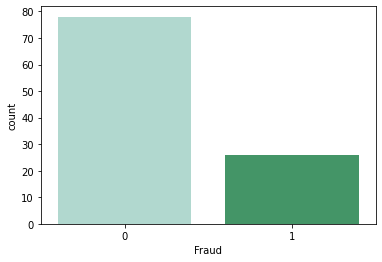

In [88]:
sns.countplot(x="Fraud", data = preds, palette="BuGn")

In [89]:
# Define function to consolidate and display performance metrics

def gen_performance_metrics(y_true, y_preds, y_preds_proba, model_name, round_to=3):
    accuracy = round(metrics.accuracy_score(y_true, y_preds), round_to)
    f1_score = round(metrics.f1_score(y_true, y_preds), round_to)
    roc_auc = round(metrics.roc_auc_score(y_true, y_preds_proba), round_to)
    avg_precision = round(metrics.average_precision_score(y_true, y_preds_proba), round_to)

    df1 = pd.DataFrame([[model_name, accuracy, f1_score, roc_auc, avg_precision]], 
                        columns=['Model', 'Accuracy', 'F1 Score', 'ROC AUC Score', 'Average Precision'])
    
    display(df1)
    display(metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_preds))

,Model,Accuracy,F1 Score,ROC AUC Score,Average Precision
0,AutoXGB,0.933,0.877,0.985,0.974


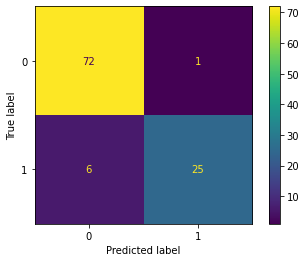

In [90]:
import sklearn.metrics as metrics
gen_performance_metrics(y_test, preds, y_preds_proba, 'AutoXGB')

#### Testando técnicas de balanceamento - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.3)